# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
"df_raw.count()"
len(df_raw.index)

400

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [8]:
df_raw.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE and GPA are measured on different scales.

#### Question 4. Drop data points with missing data


In [39]:
df_copy = df_raw.dropna()
df_copy.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [43]:
df_raw[pd.isnull(df_raw).any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [44]:
len(df_copy.index)

397

Answer: Subtract the total number of rows with null values ("df_raw[pd.isnull(df_raw).any(axis=1)]") from the total number of rows in the original dataframe ("len(df_copy.index)").

#### Question 6. Create box plots for GRE and GPA

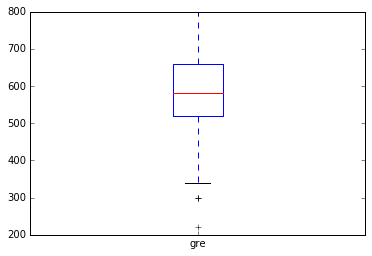

In [49]:
#boxplot 1
df_copy['gre'].plot(kind='box')

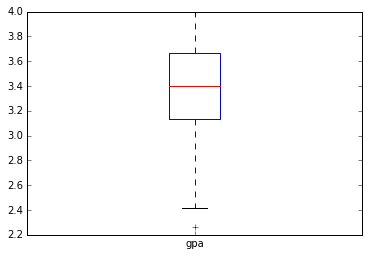

In [50]:
#boxplot 2 
df_copy['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: These plots show the minimum, maximum, median, quartiles, and outliers.

#### Question 8. Describe each distribution 

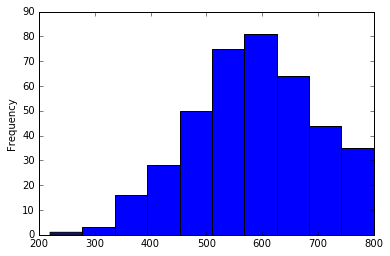

In [61]:
# plot the distribution of each variable 
%matplotlib inline
df_copy['gre'].plot(kind="hist")

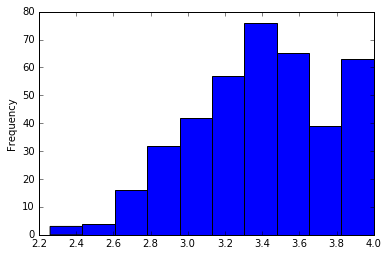

In [62]:
df_copy['gpa'].plot(kind="hist")

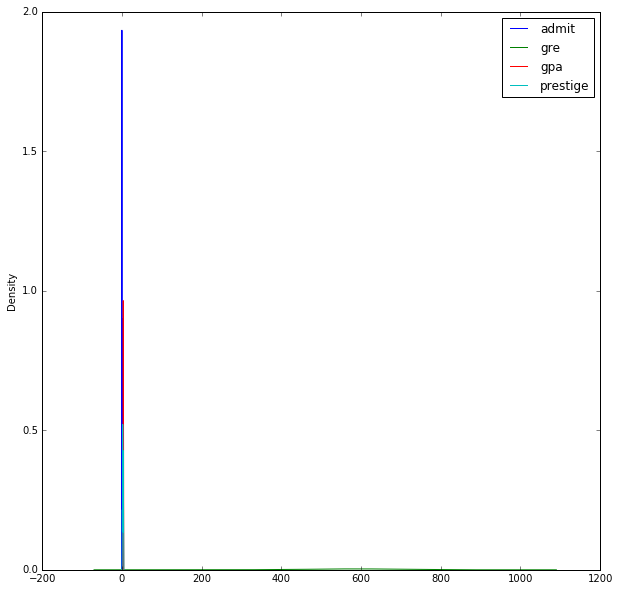

In [95]:
df_copy.plot(kind="density",
              figsize=(10,10))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [86]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='admit ~ prestige ', data=df_copy).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Mon, 24 Oct 2016   Prob (F-statistic):           9.02e-07
Time:                        23:13:06   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000         0.490     0.741
prestige      -0.1199      0.024     -4.991      0.000        -0.167    -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
df_copy.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [67]:
df_copy.kurt()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

Answer: No. Skew and kurtosis are both off.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, we need to get dummies for prestige.

#### Question 11. Which of our variables are potentially colinear? 

In [72]:
# create a correlation matrix for the data
df_copy.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [93]:
"GRE and GPA are potentially colinear. They're the closest to 1 on the correlation matrix."

"GRE and GPA are potentially colinear. They're the closest to 1 on the correlation matrix."

#### Question 12. What did you find?

Answer: I found, in general, that the variables were left skewed and had positive kurtosis.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would get_dummies for prestige, check for colinearity on the correlation matrix, print out the DAG and check the R2 and P value.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that prestige can be used to predict admit.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data